In [1567]:
import pandas as pd
import numpy as np 
from scipy.optimize import fsolve

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import re

import warnings
warnings.filterwarnings('ignore')

# Урок 1

### Задание 1 

#### Вычислите:

<img src='Matrix_operation.png'>

In [1568]:
a  = np.array([[5,7,11.3,25],[10,12,5,30]]).T
a

array([[ 5. , 10. ],
       [ 7. , 12. ],
       [11.3,  5. ],
       [25. , 30. ]])

In [1569]:
7*a+2*a

array([[ 45. ,  90. ],
       [ 63. , 108. ],
       [101.7,  45. ],
       [225. , 270. ]])

### Задание 2

#### 1.Решите систему уравнений

### 3x – 2y + 5z = 7
### 7x + 4y – 8z = 3
### 5x – 3y – 4z = –12

#### Линейная или нелинейная это система? А каждое уравнение по отдельности?

In [1570]:
system_eq = ["3x -2y +5z = 7","7x +4y -8z = 3","5x -3y -4z = -12"]

In [1571]:
cramer_matrix = np.array([],int)
right_matrix = np.array([],int)
for i in system_eq:
    numbers = [int(i) for i in re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", i)]
    cramer_matrix = np.append(cramer_matrix, numbers[:-1])
    right_matrix = np.append(right_matrix, numbers[-1:])
    

In [1572]:
cramer_matrix = cramer_matrix.reshape(-1,3)
cramer_matrix

array([[ 3, -2,  5],
       [ 7,  4, -8],
       [ 5, -3, -4]])

In [1573]:
variables = ["X","Y","Z"]

if np.linalg.det(cramer_matrix):
    ans = []
    print("Right answers:")
    for i,j in enumerate(["X","Y","Z"]):
        temp = cramer_matrix.copy()
        temp[:,i] = right_matrix
        det = int(np.round(np.linalg.det(temp) / np.round(np.linalg.det(cramer_matrix))))
        ans.append(det)
        print(f"{j} = {det}")
else:
    print("No Solution!!")
    assert False

Right answers:
X = 1
Y = 3
Z = 2


In [1574]:
# checking
for i,j in enumerate (cramer_matrix):
    if sum(j * ans) == right_matrix[i]:
        print(f"{system_eq[i]:<17} is right, with right answers!")
    else: assert False

3x -2y +5z = 7    is right, with right answers!
7x +4y -8z = 3    is right, with right answers!
5x -3y -4z = -12  is right, with right answers!


In [1575]:
# система и уравнения линейнае

#### 2.Решите систему уравнений:

### x2 + y∙x – 9 = 0
### x – y/5 = 0

#### Линейная или нелинейная это система? А каждое уравнение по отдельности?

In [1576]:
# Результат решения системы ур-ний:

# y = 5x

# x*x + 5*x*x - 9 = 0

# 6 * x * x - 9 = 0

In [1577]:
a = 6
b = 0
c = -9

discrim = (b**2) - (4 * a * c)

sol1 = ((b*-1)+discrim**0.5)/(2*a)
sol2 = ((b*-1)-discrim**0.5)/(2*a)

In [1578]:
print ("Equation has 2 solutions:")
print(f"First solution:  X = {sol1:>19}, Y = {sol1*5:>18} ")
print(f"Second solution: X = {sol2:>19}, Y = {sol2*5:>18} ")

Equation has 2 solutions:
First solution:  X =  1.2247448713915892, Y =  6.123724356957946 
Second solution: X = -1.2247448713915892, Y = -6.123724356957946 


In [1579]:
# система нелинейная, первое уравнение - квадратное, второе - линейное.

### Задание 3

#### Решите задачу:
#### Площадь пола прямоугольной комнаты равна 48 м2,а его периметр равен 28 м. Найдите длину и ширину комнаты.

In [1580]:
# x * y = 48

# 2 * x + 2 * y  = 28  // transformation & simplification

# x = 14 - y

# (14 - y) * y = 48

# 14*y - y*y = 48

# y*y - 14*y  + 48 = 0

In [1581]:
a = 1
b = -14
c = 48

discrim = (b**2) - (4 * a * c)

sol1 = ((-b)+discrim**0.5)/(2*a)
sol2 = ((-b)-discrim**0.5)/(2*a)

In [1582]:
print ("Equation has 2 solutions:")
print(f"First solution:  X = {sol1:>3},  Y = {14 - sol1:>3} ")
print(f"Second solution: X = {sol2:>3},  Y = {14 - sol2:>3} ")
print()
print("Right answer: room's length = 8m , room's width = 6m")

Equation has 2 solutions:
First solution:  X = 8.0,  Y = 6.0 
Second solution: X = 6.0,  Y = 8.0 

Right answer: room's length = 8m , room's width = 6m


### Задание 4

#### Постройте на одном графике две кривые y(x) для функции двух
#### переменной y(k,x)=cos(k∙x), взяв для одной кривой значение k=1,
#### а для другой – любое другое k, не равное 1

In [1583]:
K1 = 1 
K2 = 2

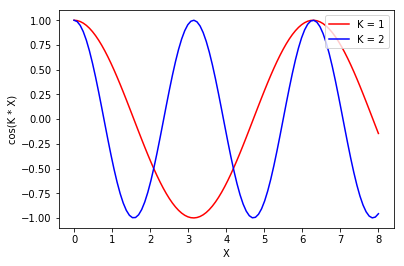

In [1584]:
x = np.linspace(0,8,100)
plt.plot(x, np.cos(x * K1), color = "red", label = f"K = {K1}")
plt.plot(x, np.cos(x * K2), color = "blue", label = f"K = {K2}")
plt.xlabel("X")
plt.ylabel("cos(K * X)")
plt.legend(loc = 1);

# Урок 2

### Задание 1 


#### Даны два вектора в трехмерном пространстве: (20,20,20) и (0,0,-20)
#### Найдите их сумму. 
#### Напишите код на Python, реализующий расчет длины вектора, заданного его координатами. 


In [1585]:
a = np.array([[20, 20, 20]]).T
b = np.array([[0, 0, -20]]).T
a

array([[20],
       [20],
       [20]])

In [1586]:
b

array([[  0],
       [  0],
       [-20]])

In [1587]:
a + b

array([[20],
       [20],
       [ 0]])

In [1588]:
def vector_length(vector):
    return np.float(sum(vector**2)**0.5)

In [1589]:
vector_length(a)

34.64101615137755

In [1590]:
vector_length(b)

20.0

In [1591]:
vector_length(np.array([[30, 40]]).T)

50.0

In [1592]:
#  checking result 

In [1593]:
np.linalg.norm(a), np.linalg.norm(b), np.linalg.norm(np.array([[30, 40]]).T)

(34.64101615137755, 20.0, 50.0)

### Задание 2

#### Почему прямые не кажутся перпендикулярными?


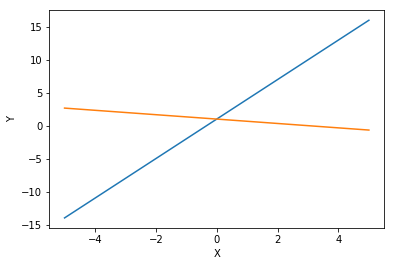

In [1594]:
x = np.linspace(-5, 5, 21)
y = 3 * x + 1 
y2 = (-1/3) * x + 1 
plt.plot(x, y);
plt.plot(x, y2);
plt.xlabel("X");
plt.ylabel("Y");

In [1595]:
# (angle formula )   tg (γ) = (k1 - k2)/(1 + k1·k2)
# 1 + k1·k2 = 0 (lines are perpendecular !!!)

In [1596]:
# need to make axis equality in mathplotlib

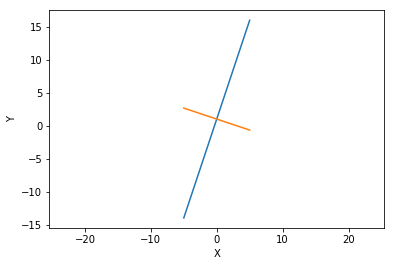

In [1597]:
x = np.linspace(-5, 5, 21)
y = 3 * x + 1 
y2 = (-1/3) * x + 1 
plt.plot(x, y);
plt.plot(x, y2);
plt.axis('equal')
plt.xlabel("X");
plt.ylabel("Y");

### Задание 3

#### Напишите код на Python, реализующий построение графиков:
#### окружности,
#### эллипса,
#### гиперболы.


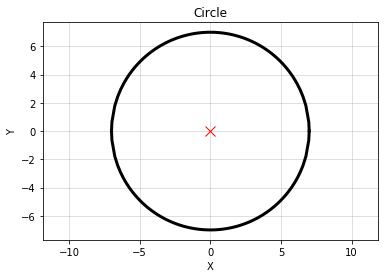

In [1598]:
# circle
R = 7
x = np.linspace(-10, 10, 100)
y = (R**2 - x**2)**0.5

mx = max(np.argwhere(np.isnan(y[:int(len(y)/2)])))
x[mx] = -R
x[len(y) - 1 - mx] = R
y[mx] = 0
y[len(y) - 1 - mx] = 0

plt.plot(x, y, linewidth = 3, color = "black")
plt.plot(x, -y, linewidth = 3, color = "black")
plt.plot(0, 0,marker='x', markersize=10, color="red")
plt.axis('equal')
plt.grid(alpha = 0.5)
plt.title("Circle")
plt.xlabel("X")
plt.ylabel("Y");

In [1599]:
mx

array([14], dtype=int64)

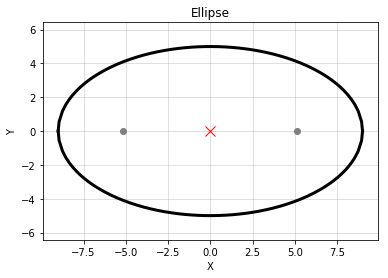

In [1600]:
# ellipse
R1 = 9
R2 = 5
c = ((R1**2 + R2**2)**0.5)*0.5
x = np.linspace(-20, 20, 200)
y = (((R1**2 * R2**2) - (x**2)*R2**2 ) / R1**2)**0.5

mx = max(np.argwhere(np.isnan(y[:int(len(y)/2)])))
x[mx] = -R1
x[len(y) - 1 - mx] = R1
y[mx] = 0
y[len(y) - 1 - mx] = 0


plt.plot(x, y, linewidth = 3, color = "black")
plt.plot(x, -y, linewidth = 3, color = "black")
plt.axis('equal')
plt.grid(alpha = 0.5)
plt.plot(0, 0,marker='x', markersize=10, color="red")
plt.plot([c,-c],[0,0],"o",color = "grey")
plt.title("Ellipse")
plt.xlabel("X")
plt.ylabel("Y");

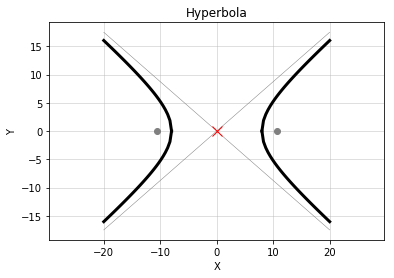

In [1601]:
# hiperbola
R1 = 8
R2 = 7
c = ((R1**2 + R2**2)**0.5)
x = np.linspace(-20, 20, 100)
y = (((R1**2 * R2**2)*-1 + (x**2)*R2**2 ) / R1**2)**0.5

mx = min(np.argwhere(np.isnan(y[:int(len(y)/2)])))
x[mx] = -R1
x[len(y) - 1 - mx] = R1
y[mx] = 0
y[len(y) - 1 - mx] = 0


plt.plot(x, y, linewidth = 3, color = "black")
plt.plot(x, -y,  linewidth = 3, color = "black")

plt.plot(x, R2/R1*x, color = "grey",linewidth = 0.5)
plt.plot(x,-R2/R1*x, color = "grey",linewidth = 0.5)

plt.axis('equal')
plt.grid(alpha = 0.5)
plt.plot(0, 0,marker='x', markersize=10, color="red")
plt.plot([c,-c],[0,0],"o", color = "grey")
plt.title("Hyperbola")
plt.xlabel("X")
plt.ylabel("Y");

### Задание 4

#### 1. Пусть задана плоскость: Ax+By+Cz+D = 0
#### Напишите уравнение плоскости, параллельной данной и проходящей через начало координат.

In [1602]:
print("Ax+By+Cz = 0")

Ax+By+Cz = 0


#### 2.Пусть задана плоскость: A1x + B1y + C1z + D1 = 0 и прямая: 

<img src='Line_1.png'>

#### Как узнать, принадлежит прямая плоскости или нет?

In [1603]:
# if points (x1, y1, z1) and (x2, y2, z2) is on surface, line also on this surface. 

### Задание 5

#### 1. Нарисуйте трехмерный график двух параллельных плоскостей.

In [1604]:
# surface1 = 4x + 8y + 2z - 4 = 0
# 2x + 4y + z = 2
# z = 2 - 2x - 4y

In [1605]:
# surface2 = 4x + 8y + 2z + 10 = 0
# z = -5 - 2x - 4y

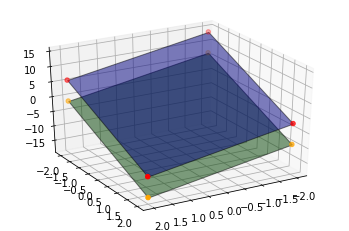

In [1606]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.linspace(-2, 2, 2)
Y = np.linspace(-2, 2, 2)
X, Y = np.meshgrid(X, Y)

Z1 = 2 - 2*X - 4*Y
Z2 = -5 - 2*X - 4*Y

ax.plot_surface(X, Y, Z1, alpha = 0.5, color = "blue", edgecolor='black')
ax.plot_surface(X, Y, Z2, alpha = 0.5, color = "green", edgecolor='black')

ax.scatter3D(X,Y,Z1, c = "red")
ax.scatter3D(X,Y,Z2, c = "orange")
ax.view_init(30, 60)

#### 2. Нарисуйте трехмерный график двух любых поверхностей второго порядка

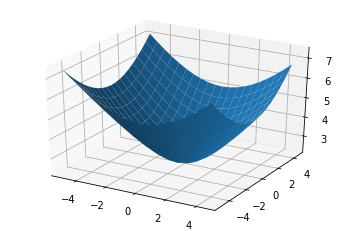

In [1607]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt((X**2 + Y**2)+5)
surf = ax.plot_surface(X, Y, Z)


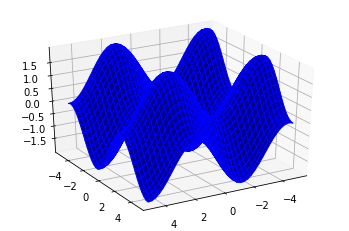

In [1608]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X) + np.sin(Y)
surf = ax.plot_surface(X, Y, Z,linewidth=1, color ="blue", edgecolor ="blue")
ax.view_init(30, 60)

# Урок 3

### Задание 1 


#### Нарисуйте график функции:
#### y(x) = k∙cos(x – a) + b
#### для некоторых (2-3 различных) значений параметров k, a, b


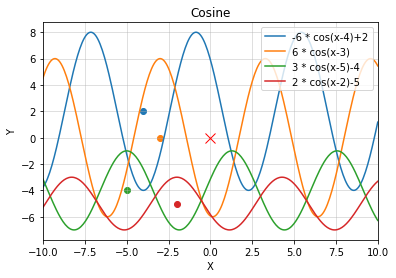

In [1625]:
# cos
x = np.linspace(-10, 10, 300)

for i in range (4):
    k, a, b = np.random.randint(-7,7, size=(1, 3))[0]
    y = k * np.cos(x - a) + b
    plt.plot(x, y , linewidth = 1.5,
             label = f"{k} * cos(x{'-'*(a>0)}{str(a)*(a!=0)}){'+'*(b>0 and b!= 0)}{str(b)*(b!=0)}")
    plt.scatter(a,b)

plt.legend()
plt.grid(alpha = 0.5)
plt.plot(0, 0,marker='x', markersize=10, color="red")
plt.title("Cosine")
plt.xlim(-10,10)
plt.xlabel("X")
plt.ylabel("Y");

### Задание 2

#### Докажите, что при ортогональном преобразовании сохраняется расстояние между точками.

In [1610]:
#...

### Задание 3 

#### Напишите код, который будет переводить полярные координаты в декартовы.

In [1611]:
def dec2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, rad)

def pol2dec(rho, rad):
    x = rho * np.cos(rad)
    y = rho * np.sin(rad)
    return(x, y)

#### Напишите код, который будет рисовать график окружности в полярных координатах.

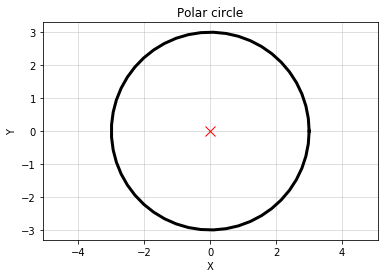

In [1612]:
R = 3
rad = np.linspace(0, 2*np.pi, 50)
plt.plot(*pol2dec(R, rad), linewidth = 3, color = "black")
plt.plot(0,0,marker='x', markersize=10, color="red")
plt.axis('equal')
plt.grid(alpha = 0.5)
plt.title("Polar circle")
plt.xlabel("X")
plt.ylabel("Y");


### Задание 4

#### Решите систему уравнений:
#### y = x2 – 1
#### exp(x) + x∙(1 – y) = 1


Equations roots:
 [[ 2.61814557  5.85468624]
 [ 4.20010584 16.64088908]
 [-1.58183535  1.50220308]]


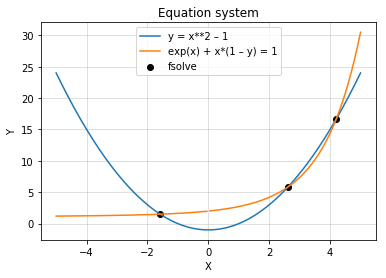

In [1613]:
def f(vars1):
    x,y = vars1
    return [y - x**2 + 1, np.exp(x) + x - x*y - 1] 

x = np.linspace(-5,5,201)
y1 = x**2-1
y2 = (np.exp(x)+x-1)/x  
plt.plot(x,y1,label = "y = x**2 – 1")
plt.plot(x,y2, label = "exp(x) + x*(1 – y) = 1")

k = np.array([fsolve(f,i)  for i in [[3,5],[4,15],[-2,5]] ]).T
plt.scatter(k[0],k[1], label = "fsolve", c = "black")

plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Equation system")
plt.grid(alpha = 0.5);
print("Equations roots:\n",k.T)

#### Решите систему уравнений и неравенств:

#### y = x2 – 1
#### exp(x) + x∙(1 – y) > 1

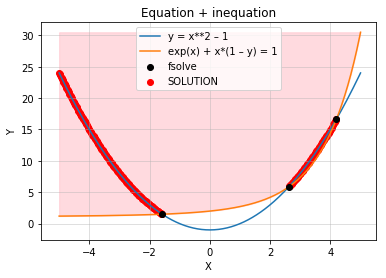

In [1631]:
def f(vars1):
    x,y = vars1
    return [y - x**2 + 1, np.exp(x) + x - x*y - 1] 

x = np.linspace(-5,5,500)
y1 = x**2-1
y2 = (np.exp(x)+x-1)/x  
plt.plot(x,y1,label = "y = x**2 – 1")
plt.plot(x,y2, label = "exp(x) + x*(1 – y) = 1")
plt.fill_between(x,y2,x*0+max(y2), color = "lightpink",alpha = 0.5)

k = np.array([fsolve(f,i)  for i in [[3,5],[4,15],[-2,5]] ]).T
plt.scatter(k[0],k[1], label = "fsolve", color = "black",zorder = 10)

plt.scatter(x[y1>y2],y1[y1>y2],label = "SOLUTION",color = "red",zorder = 1)


plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Equation + inequation")
plt.grid(alpha = 0.5);